In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b>Analisis Exploratorio para la realizacion de un modelo de Machine Learning de recomendacion de peliculas<b>

In [2]:
#IMPORTAMOS EL CSV A MODIFICAR
df = pd.read_csv("plataformas.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             22998 non-null  object
 1   type           22998 non-null  object
 2   title          22998 non-null  object
 3   director       14739 non-null  object
 4   cast           17677 non-null  object
 5   country        11499 non-null  object
 6   date_added     13444 non-null  object
 7   release_year   22998 non-null  int64 
 8   rating_x       22998 non-null  object
 9   listed_in      22998 non-null  object
 10  description    22994 non-null  object
 11  duration_int   22998 non-null  int64 
 12  duration_type  22516 non-null  object
 13  rating_y       22998 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 2.5+ MB


In [4]:
df.head()

,id,type,title,director,cast,country,date_added,release_year,rating_x,listed_in,description,duration_int,duration_type,rating_y
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,110,min,4
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74,min,4
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",69,min,4
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,45,min,3


<c>Nos fijamos de las columnas la cantidad de filas que contiene el dataframe para luego descartar columnas<c>

In [5]:
#Cantidad de nulos por columna
df.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating_x             0
listed_in            0
description          4
duration_int         0
duration_type      482
rating_y             0
dtype: int64

<c>Descarto las columnas director, cast, country, date_added, rating_y, duration_type, duration_int por estos motivos:<c>  
<b>-Tienen muchos nulos<b>  
<b>-Para el sistema de recomendacion planteado, las columnas nombradas son irrelevantes<b>  
<b>-Voy a normalizar nuevamente la columna rating_y pero repitiendo los valores<b>  

In [6]:
#Borro las columnas
df = df.drop(columns=["director","cast","country","date_added","rating_y", "duration_int","duration_type"])

In [7]:
df.head()

,id,type,title,release_year,rating_x,listed_in,description
0,as1,movie,the grand seduction,2014,g,"comedy, drama",a small fishing village must procure a local d...
1,as2,movie,take care good night,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...
2,as3,movie,secrets of deception,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...
3,as4,movie,pink: staying true,2014,g,documentary,"pink breaks the mold once again, bringing her ..."
4,as5,movie,monster maker,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...


<b>Normalizamos algunas columnas<b>

In [8]:
# RENOMBRAMOS LA COLUMNA "rating_x" A "rating"
df = df.rename(columns={'rating_x': 'rating'})

In [9]:
#IMPORTAMOS TODOS LOS CSV EN UNA VARIABLE DIFERENTE
rating1 = pd.read_csv("ratings/1.csv")
rating2 = pd.read_csv("ratings/2.csv")
rating3 = pd.read_csv("ratings/3.csv")
rating4 = pd.read_csv("ratings/4.csv")
rating5 = pd.read_csv("ratings/5.csv")
rating6 = pd.read_csv("ratings/6.csv")
rating7 = pd.read_csv("ratings/7.csv")
rating8 = pd.read_csv("ratings/8.csv")
#UNIMOS TODOS LAS VARIABLES EN UNA SOLA CON UN CONCAT(CONCATENAR)
df_rating = pd.concat([rating1,rating2,rating3,rating4,rating5,rating6,rating7,rating8])
df_rating = df_rating.drop(columns=["timestamp"])
#AGRUPAMOS TODAS LAS VARIABLES REPETIDAS EN "MOVIEID".
#PARA QUE NO HAYA REPETICION DE INFORMACION, SACAMOS UN PROMEDIO Y LO RENDONDEAMOS
df_rating = round(df_rating.groupby('movieId', as_index=False)['rating'].mean(),1)
#CAMBIAMOS EL NOMBRE DE LA COLUMNA "RATING" POR "SCORE"
df_rating = df_rating.rename(columns={"rating":"score"})

<c>Termine agrupando y haciendo un promedio, ya que al no hacer eso y hacer un left join me quedaban 7 millones de registros, intente hacer un modelo con esa cantidad de registros y no podia implementar luego el deploymente en render con fastApi.<c>  
<c>Pesaba mucho<c>

In [10]:
#modelo = pd.merge(df_rating, df, left_on="movieId", right_on="id", how="left")
modelo = pd.merge(df, df_rating, left_on='id',right_on='movieId')

In [11]:
modelo.head()

,id,type,title,release_year,rating,listed_in,description,movieId,score
0,as1,movie,the grand seduction,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,3.5
1,as2,movie,take care good night,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,as2,3.5
2,as3,movie,secrets of deception,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,3.5
3,as4,movie,pink: staying true,2014,g,documentary,"pink breaks the mold once again, bringing her ...",as4,3.5
4,as5,movie,monster maker,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,3.5


In [12]:
#DROPEO LA COLUMNA "movieId"
modelo = modelo.drop(columns=["movieId"])
#CAMBIO DE LUGAR LAS COLUMNAS
modelo = modelo.reindex(columns=["id","type","title","release_year","rating","score","listed_in","description"])

In [13]:
#DROPEAMOS ESTAS COLUMNAS YA QUE NO ME SIRVEN PARA MI MODELO
modelo = modelo.drop(columns=["id","release_year","rating"])

In [14]:
#FILTRAMOS PARA EL MODELO SOLAMENTE EL TIPO "MOVIE"
modelo = modelo[modelo["type"]== "movie"]

In [15]:
#Y POR ULTIMO DESCARTAMOS LISTED_IN, YA QUE EL MODELO DE RECOMENDACION QUE VOY A USAR ES EN BASE
# A SIMILITUDES DE ACUERDO A LA DESCRIPCION DE LA PELICULA
modelo = modelo.drop(columns=["type","listed_in"])

In [16]:
modelo

,title,score,description
0,the grand seduction,3.5,a small fishing village must procure a local d...
1,take care good night,3.5,a metro family decides to fight a cyber crimin...
2,secrets of deception,3.5,after a man discovers his wife is cheating on ...
3,pink: staying true,3.5,"pink breaks the mold once again, bringing her ..."
4,monster maker,3.5,teenage matt banting wants to work with a famo...
...,...,...,...
22992,zinzana,3.6,recovering alcoholic talal wakes up inside a s...
22993,zodiac,3.4,"a political cartoonist, a crime reporter and a..."
22995,zombieland,3.4,looking to survive in a world taken over by zo...
22996,zoom,3.6,"dragged from civilian life, a former superhero..."


In [17]:
#NOS FIJAMOS LOS NULOS QUE NOS QUEDARON
modelo.isnull().sum()

title          0
score          0
description    3
dtype: int64

In [18]:
#RELLENAMOS LAS COLUMNAS VACIAS CON "Vacio"
modelo = modelo.fillna("Vacio")

In [19]:
modelo.head()

,title,score,description
0,the grand seduction,3.5,a small fishing village must procure a local d...
1,take care good night,3.5,a metro family decides to fight a cyber crimin...
2,secrets of deception,3.5,after a man discovers his wife is cheating on ...
3,pink: staying true,3.5,"pink breaks the mold once again, bringing her ..."
4,monster maker,3.5,teenage matt banting wants to work with a famo...


In [20]:
modelo.to_csv("Modelo-MC.csv",index=False)

<b>Analisis con grafico para determinar valores atipicos<b>

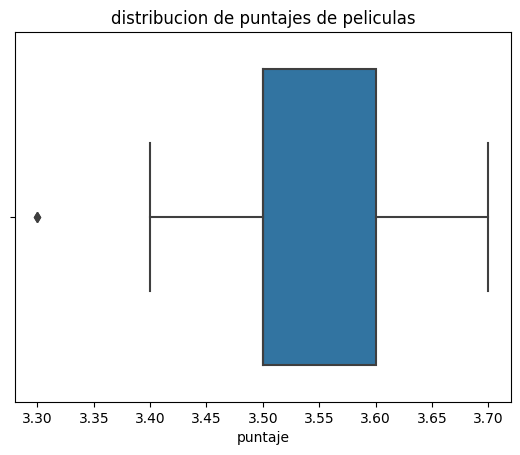

In [21]:
sns.boxplot(x=modelo["score"])
plt.title("distribucion de puntajes de peliculas") 
plt.xlabel("puntaje")
plt.show()

In [22]:
df = pd.read_csv("Modelo-MC.csv")

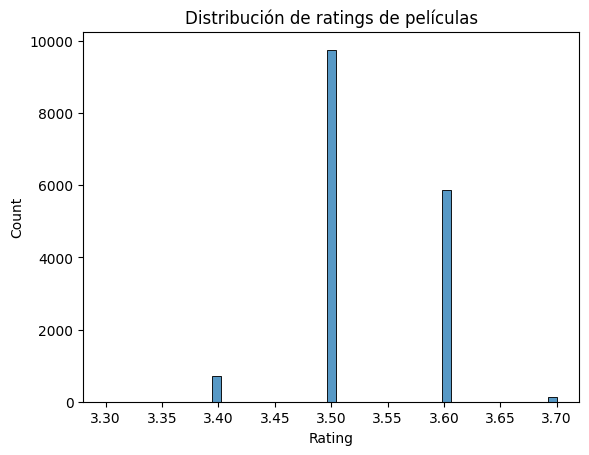

In [23]:
sns.histplot(data=df, x="score")
plt.title("Distribución de ratings de películas")
plt.xlabel("Rating")
plt.show()

In [24]:
df

,title,score,description
0,the grand seduction,3.5,a small fishing village must procure a local d...
1,take care good night,3.5,a metro family decides to fight a cyber crimin...
2,secrets of deception,3.5,after a man discovers his wife is cheating on ...
3,pink: staying true,3.5,"pink breaks the mold once again, bringing her ..."
4,monster maker,3.5,teenage matt banting wants to work with a famo...
...,...,...,...
16476,zinzana,3.6,recovering alcoholic talal wakes up inside a s...
16477,zodiac,3.4,"a political cartoonist, a crime reporter and a..."
16478,zombieland,3.4,looking to survive in a world taken over by zo...
16479,zoom,3.6,"dragged from civilian life, a former superhero..."


<b>Empezamos el modelo con el dataframe que nos quedo<b>

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
tfidf_vectorizer  = TfidfVectorizer(stop_words='english')

#ENTRENO EL MODELO
X_train = tfidf_vectorizer.fit_transform(df['description'])

In [27]:
# CALCULO LA SIMILITUD DEL COSENO
cosine_sim = cosine_similarity(X_train, X_train)

<c>La similitud del coseno es una medida que nos permite calcular la similitud entre dos vectores en un espacio n-dimensional. En el contexto de recomendaciones de películas, los vectores representan las descripciones de las películas, y la similitud del coseno nos permite medir qué tan similares son dos películas en términos de sus descripciones.

Supongamos que tienes una película A con un puntaje determinado, y quieres recomendar otras películas similares a A. Para esto, se calcula la similitud del coseno entre el vector de descripción de A y el vector de descripción de cada otra película en la base de datos. Luego, se seleccionan las películas que tengan las similitudes del coseno más altas y se las recomienda.

Por ejemplo, si la película A es una comedia romántica con un puntaje alto, entonces es probable que se recomienden otras películas con descripciones similares, como otras comedias románticas con puntajes altos. La similitud del coseno nos ayuda a encontrar estas películas que son similares a A en términos de su descripción.<c>

In [28]:
#OBTENGO LOS INDICES DE LAS PELICULAS MAS SIMILARES
similar_movies = list(enumerate(cosine_sim[10]))

In [29]:
#ORDENO LAS PELICULAS POR SIMILITUD
sorted_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)

In [30]:
#OBTENGO LOS INDICES DE LAS 5 PELICULAS MAS SIMILARES
top_similar = [i[0] for i in sorted_movies[1:6]]
#IMPRIMO LAS 5 PELICULAS MAS SIMILARES 
print(df['title'].iloc[top_similar])

15134                       jake's buccaneer blast
3699     mobutu's african movie theater: episode 5
1843                  christmas recipe for romance
11053                 shiva: journey to plunotaria
5645                                   netru indru
Name: title, dtype: object


In [31]:
def get_recommendationB(title: str):
    df= pd.read_csv("Modelo-MC.csv")
    title = title.lower()
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['description'])
    idx = df.index[df['title'] == title.lower()].tolist()[0]
    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix)
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [i for i in sim_scores if i[0] != idx]
    sim_scores = sorted(sim_scores, key=lambda x: df['score'].iloc[x[0]], reverse=True)[:5]
    respuesta = df.iloc[[i[0] for i in sim_scores]]['title'].tolist()
    return {'recomendacion': respuesta}

In [32]:
get_recommendationB("tarzan")

{'recomendacion': ['tarzan ii',
  'back for good',
  'joseph: king of dreams',
  'tarzan the fearless',
  'to wong foo, thanks for everything! julie newmar']}

In [ ]:
a